In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
#Show all features
pd.set_option('display.max_columns', None)

#Read data
df = pd.read_csv('/home/ec2-user/userlostprob_train_.txt')
df.head()

,label,sampleid,d,arrival,iforderpv_24h,decisionhabit_user,historyvisit_7ordernum,historyvisit_totalordernum,hotelcr,ordercanceledprecent,landhalfhours,ordercanncelednum,commentnums,starprefer,novoters,consuming_capacity,historyvisit_avghotelnum,cancelrate,historyvisit_visit_detailpagenum,delta_price1,price_sensitive,hoteluv,businessrate_pre,ordernum_oneyear,cr_pre,avgprice,lowestprice,firstorder_bu,customereval_pre2,delta_price2,commentnums_pre,customer_value_profit,commentnums_pre2,cancelrate_pre,novoters_pre2,novoters_pre,ctrip_profits,deltaprice_pre2_t1,lowestprice_pre,uv_pre,uv_pre2,lowestprice_pre2,lasthtlordergap,businessrate_pre2,cityuvs,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,0,24636,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.04,NaN,22.0,NaN,1089.0,NaN,1933.0,NaN,NaN,1261.0,NaN,NaN,NaN,102.607,0.25,NaN,1.03,NaN,49.0,NaN,3.2,NaN,724.0,NaN,844.0,0.03,1335.0,1249.0,NaN,29.0,46.0,58.027,74.956,615.0,NaN,0.29,12.880,3.147,NaN,NaN,7,NaN,12
1,1,24637,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.06,NaN,0.0,NaN,5612.0,NaN,6852.0,NaN,NaN,3205.0,NaN,NaN,NaN,278.373,0.51,NaN,1.07,NaN,619.0,NaN,4.9,NaN,5610.0,NaN,3789.0,0.21,5430.0,7829.0,NaN,-56.0,111.0,249.347,224.920,513.0,NaN,0.53,17.933,4.913,NaN,NaN,33,NaN,14
2,0,24641,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.05,NaN,3.0,NaN,256.0,NaN,367.0,NaN,NaN,194.0,NaN,NaN,NaN,16.133,0.61,NaN,1.12,NaN,312.0,NaN,3.9,NaN,4721.0,NaN,4341.0,0.52,5353.0,7324.0,NaN,8.0,413.0,133.093,112.063,382.0,NaN,0.60,3.993,0.760,NaN,NaN,10,NaN,19
3,0,24642,2016-05-18,2016-05-18,0,NaN,NaN,NaN,1.01,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,1.780,NaN,NaN,1.01,NaN,198.0,NaN,2.1,NaN,41.0,NaN,529.0,0.53,1004.0,81.0,NaN,-7.0,188.0,4.600,58.844,203.0,NaN,0.18,3.220,0.660,NaN,NaN,8,NaN,16
4,1,24644,2016-05-18,2016-05-19,0,NaN,NaN,NaN,1.00,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.073,NaN,NaN,1.03,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,1.00,1.0,NaN,NaN,-5.0,NaN,0.213,0.157,84.0,NaN,NaN,0.013,NaN,NaN,NaN,1,NaN,21


In [3]:
df.label.describe()

count    689945.000000
mean          0.274452
std           0.446238
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
label,689945.0,0.274452,0.446238,0.000,0.000,0.000,1.000,1.000
sampleid,689945.0,628540.209625,414681.498697,24636.000,312320.000,599637.000,887460.000,2238426.000
iforderpv_24h,689945.0,0.193737,0.395226,0.000,0.000,0.000,0.000,1.000
decisionhabit_user,385450.0,5.317048,38.524483,0.000,2.000,3.000,5.000,3167.000
historyvisit_7ordernum,82915.0,1.856094,2.103862,1.000,1.000,1.000,2.000,106.000
historyvisit_totalordernum,386525.0,11.710487,17.251429,1.000,2.000,6.000,14.000,711.000
hotelcr,689148.0,1.060996,0.045264,1.000,1.030,1.050,1.090,3.180
ordercanceledprecent,447831.0,0.342119,0.354210,0.000,0.000,0.250,0.570,1.000
landhalfhours,661312.0,6.086366,12.413225,0.000,0.000,0.000,4.000,49.000
ordercanncelednum,447831.0,154.179369,398.456986,0.000,0.000,2.000,153.000,13475.000


<Axes: >

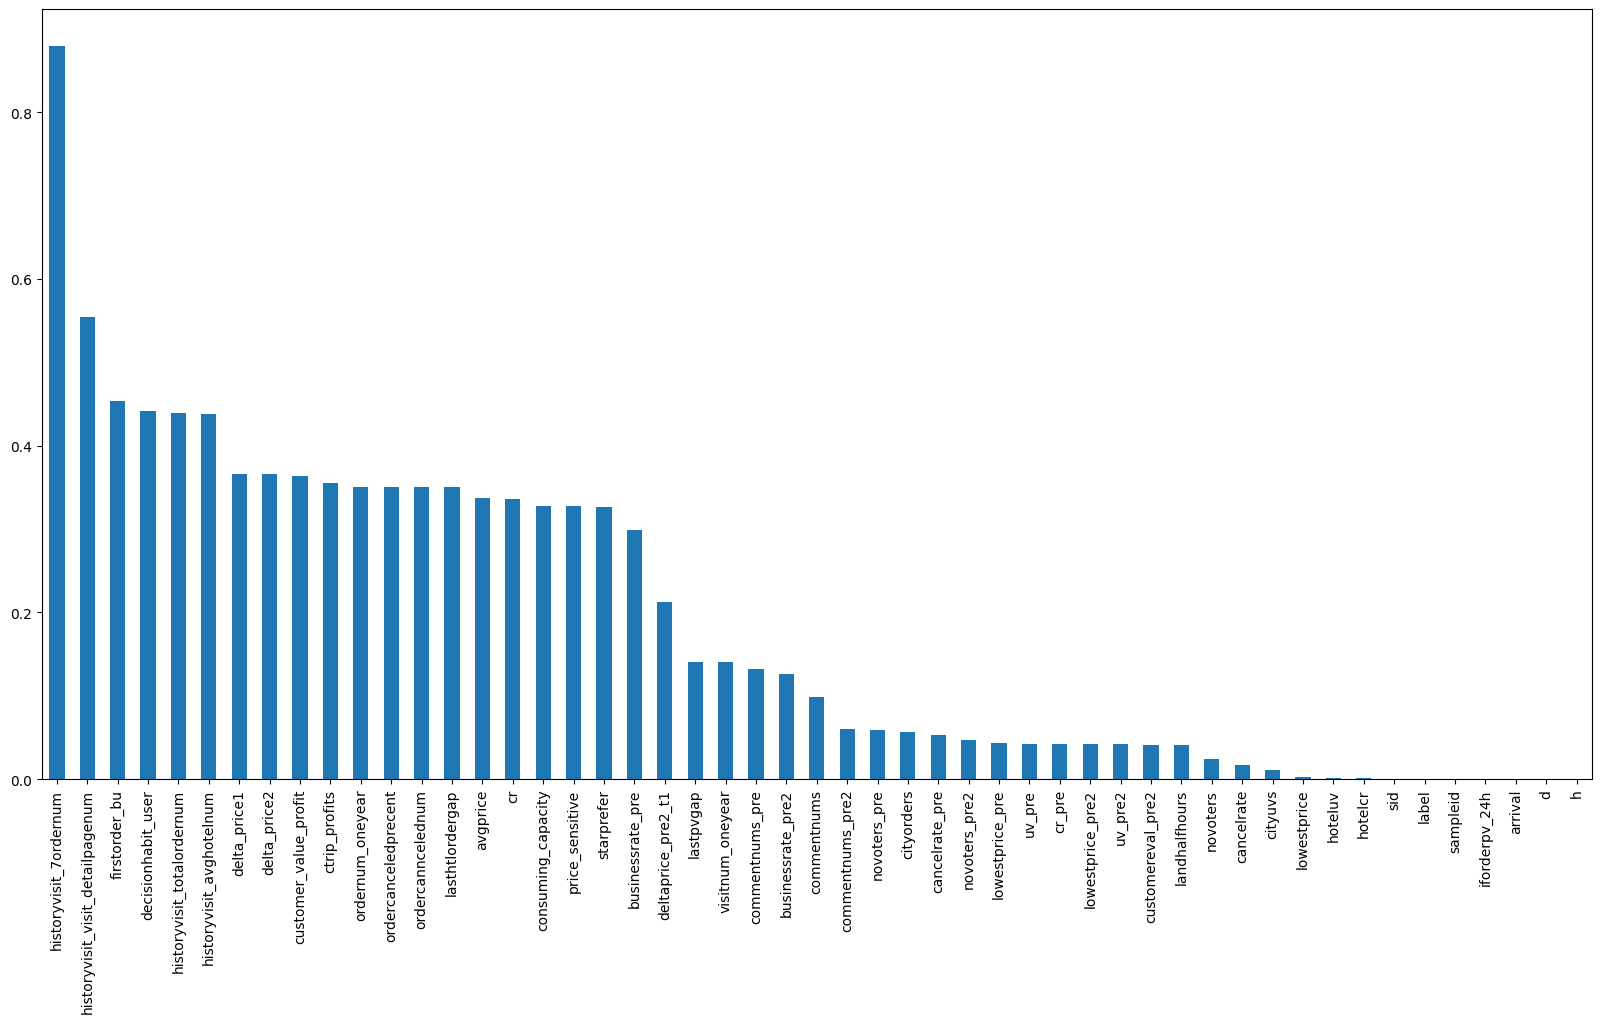

In [5]:
df.isnull().mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

array([[<Axes: title={'center': 'label'}>,
        <Axes: title={'center': 'sampleid'}>,
        <Axes: title={'center': 'iforderpv_24h'}>,
        <Axes: title={'center': 'decisionhabit_user'}>,
        <Axes: title={'center': 'historyvisit_7ordernum'}>,
        <Axes: title={'center': 'historyvisit_totalordernum'}>,
        <Axes: title={'center': 'hotelcr'}>],
       [<Axes: title={'center': 'ordercanceledprecent'}>,
        <Axes: title={'center': 'landhalfhours'}>,
        <Axes: title={'center': 'ordercanncelednum'}>,
        <Axes: title={'center': 'commentnums'}>,
        <Axes: title={'center': 'starprefer'}>,
        <Axes: title={'center': 'novoters'}>,
        <Axes: title={'center': 'consuming_capacity'}>],
       [<Axes: title={'center': 'historyvisit_avghotelnum'}>,
        <Axes: title={'center': 'cancelrate'}>,
        <Axes: title={'center': 'historyvisit_visit_detailpagenum'}>,
        <Axes: title={'center': 'delta_price1'}>,
        <Axes: title={'center': 'price_s

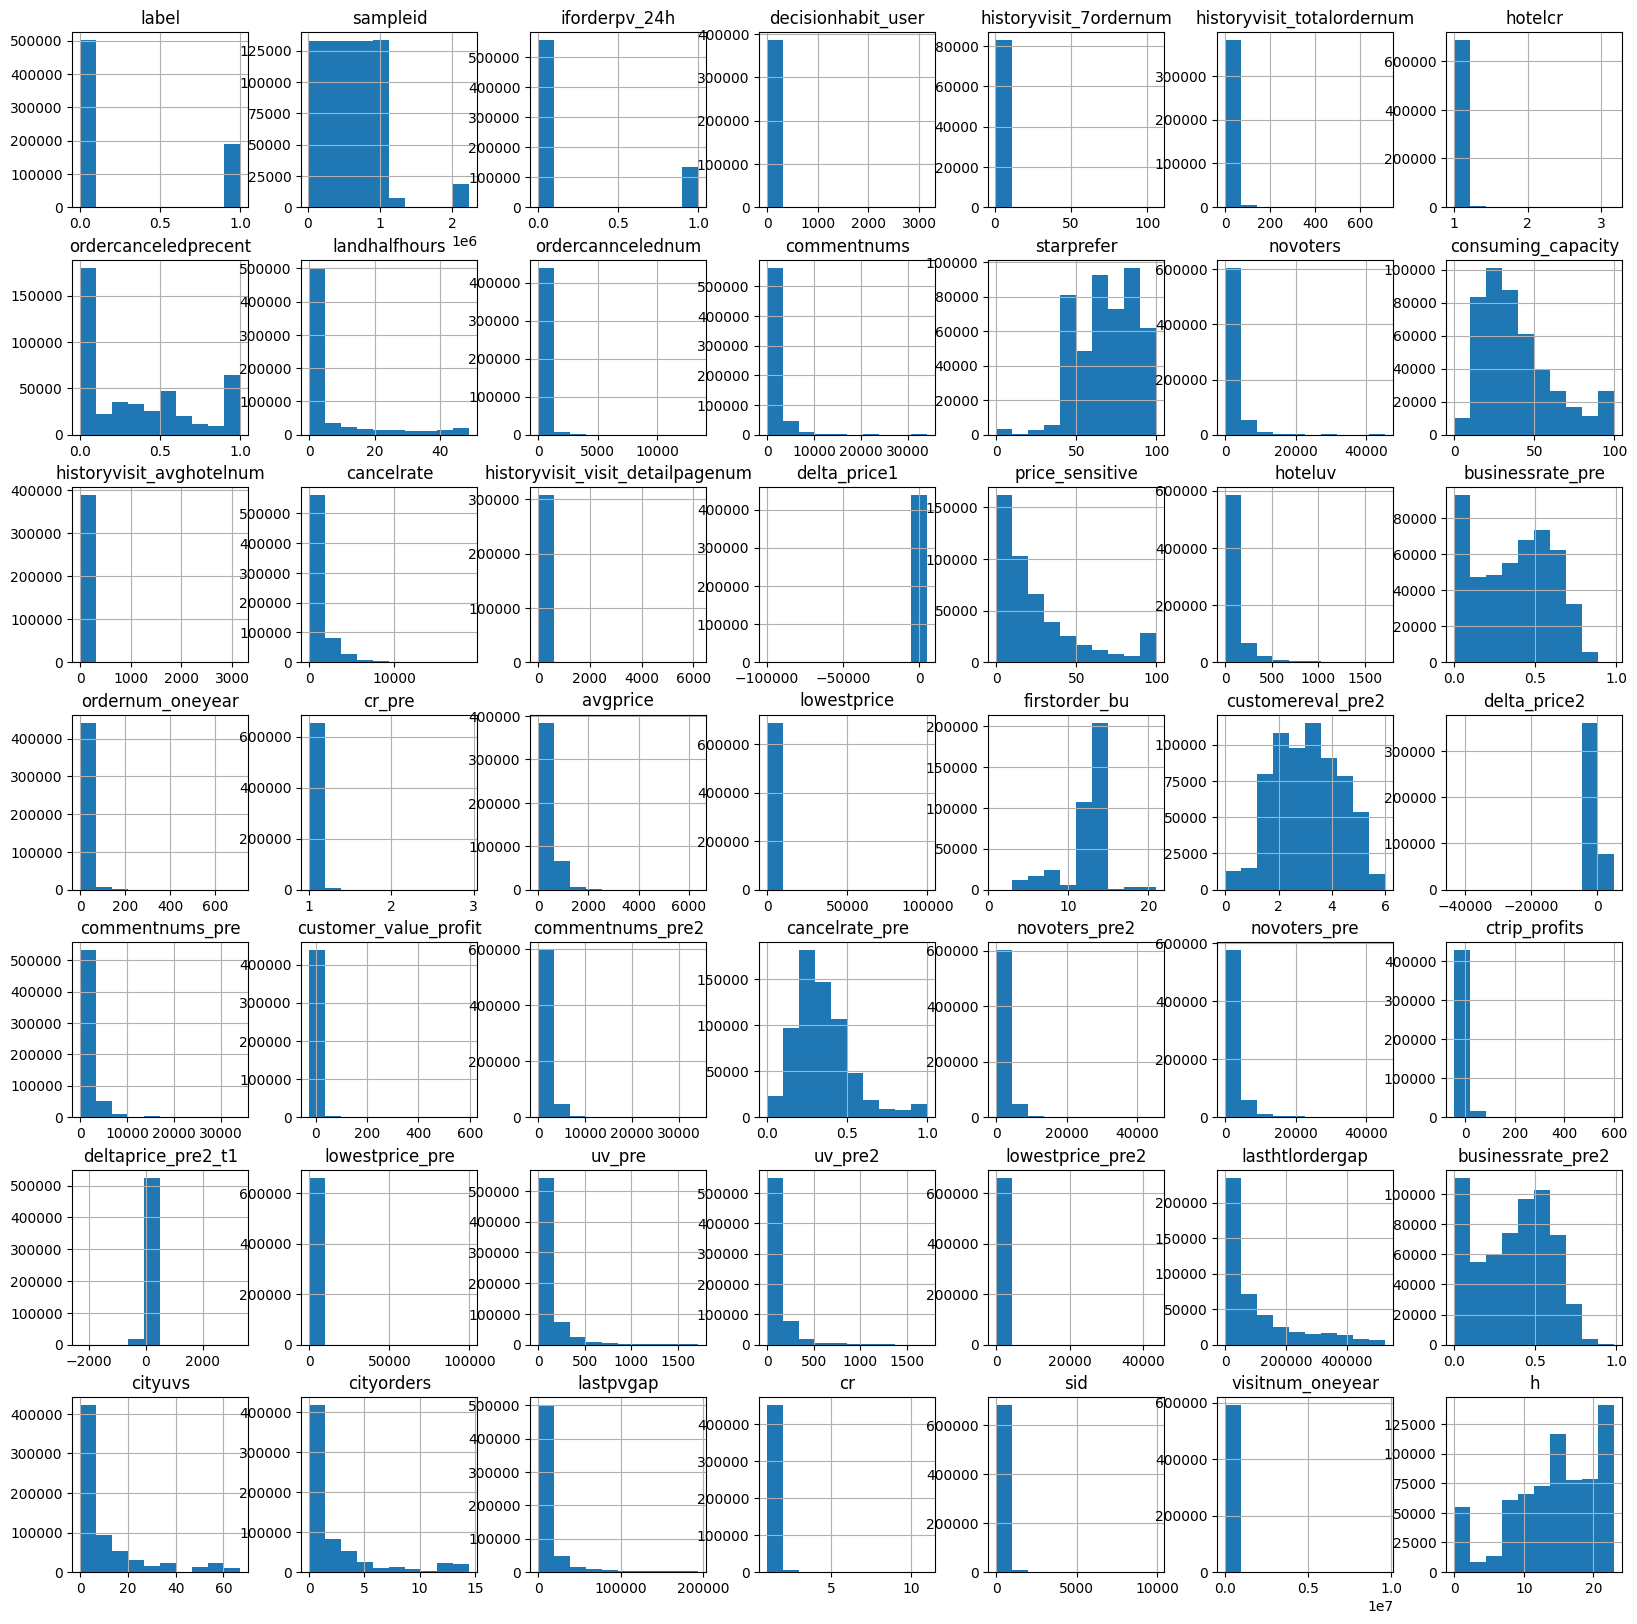

In [6]:
df.hist(figsize=(20,20))

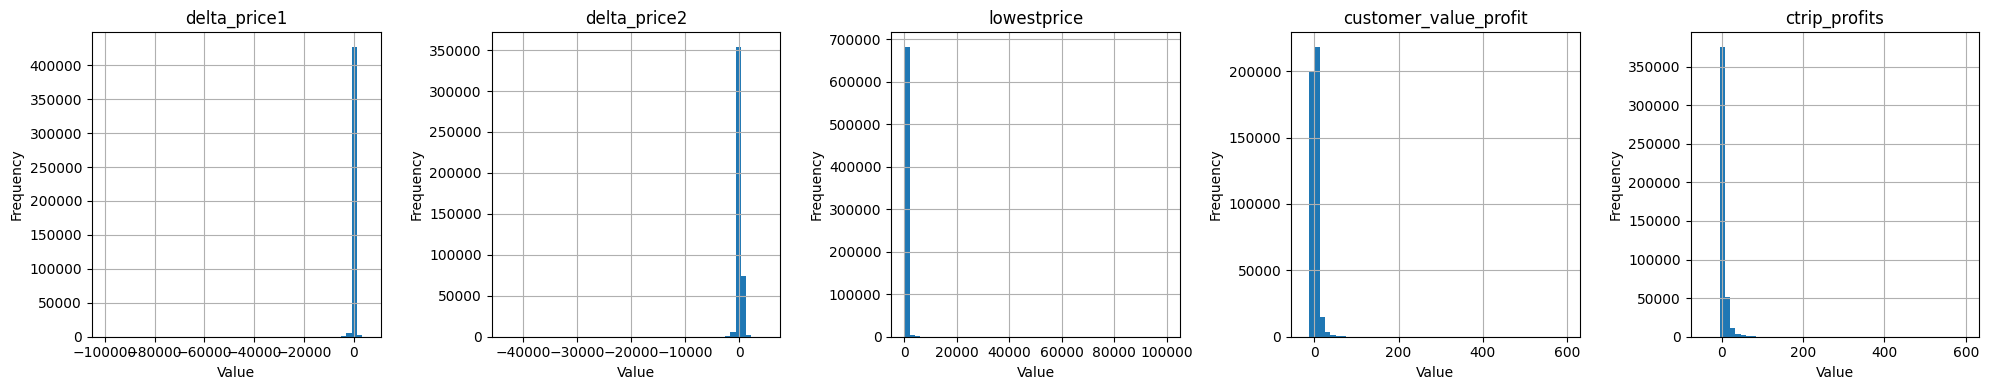

In [7]:
# List the features that need to be drawn as histograms
features = ['delta_price1', 'delta_price2', 'lowestprice', 'customer_value_profit', 'ctrip_profits']

# Set the figure size
plt.figure(figsize=(20, 4))

# Traverse each feature and draw a histogram
for i, feature in enumerate(features):
    plt.subplot(1, 5, i+1)  # Create a subplot
    df[feature].hist(bins=50)  # Draw a histogram
    plt.title(feature)  # Set the title
    plt.xlabel('Value')  # Set the x-axis label
    plt.ylabel('Frequency')  # Set the y-axis label

# Adjust the subplot layout
plt.tight_layout()
plt.show()


In [8]:
# Use describe method to get descriptive statistics
describe_df = df[features].describe()

# Print descriptive statistics
describe_df

,delta_price1,delta_price2,lowestprice,customer_value_profit,ctrip_profits
count,437146.000000,437750.000000,687931.000000,439123.000000,445187.000000
mean,79.067012,77.277208,318.806242,3.038409,4.208495
std,512.942824,391.413839,575.782415,6.625281,9.314438
min,-99879.000000,-43344.000000,-3.000000,-24.075000,-44.313000
25%,-31.000000,-29.000000,116.000000,0.269000,0.340000
50%,81.000000,69.000000,200.000000,0.991000,1.347000
75%,226.000000,198.000000,380.000000,3.138000,4.320000
max,5398.000000,5114.000000,100000.000000,598.064000,600.820000


In [9]:
features = ['customer_value_profit', 'ctrip_profits', 'starprefer']
df[features].describe()

,customer_value_profit,ctrip_profits,starprefer
count,439123.000000,445187.000000,464892.000000
mean,3.038409,4.208495,67.532304
std,6.625281,9.314438,19.175094
min,-24.075000,-44.313000,0.000000
25%,0.269000,0.340000,53.300000
50%,0.991000,1.347000,69.400000
75%,3.138000,4.320000,80.300000
max,598.064000,600.820000,100.000000


In [10]:
rawdf = df.copy()

In [11]:
drop_columns = ['sampleid', 'firstorder_bu' ]
rawdf.drop(drop_columns, axis=1, inplace=True)
rawdf.drop_duplicates(inplace=True)

In [12]:
# Convert two date variables from strings to date format
rawdf['arrival'] = pd.to_datetime(rawdf['arrival'])
rawdf['d'] = pd.to_datetime(rawdf['d'])

# Generate the number of days in advance for booking (derived variable) (interval between arrival date and visit date) (how many days in advance for booking)
rawdf['day_advanced'] = (rawdf['arrival'] - rawdf['d']).dt.days

# Format the date
rawdf['d'] = pd.to_datetime(df['d'], format='%Y-%m-%d')
rawdf['arrival'] = pd.to_datetime(df['arrival'], format='%Y-%m-%d')

# Determine the day of the week the user checked in
rawdf['arrival_weekday'] = rawdf['arrival'].map(lambda x: x.weekday())

# Determine if the day the user checked in is a weekend
def is_weekend(a):
    if int(a) in [0, 1, 2, 3, 4]:
        return 0  # 0 represents a weekday
    else:
        return 1  # 1 represents a weekend

rawdf['is_arrival_weekend'] = rawdf['arrival_weekday'].map(lambda x: is_weekend(x))

# Drop the 'd' and 'arrival' columns
rawdf.drop(labels=['d', 'arrival'], axis=1, inplace=True)


In [13]:
features = ['is_arrival_weekend', 'day_advanced']
rawdf[features].describe()

,is_arrival_weekend,day_advanced
count,684406.000000,684406.000000
mean,0.278875,3.730913
std,0.448446,6.747977
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,4.000000
max,1.000000,30.000000


In [14]:
filter_one=['customer_value_profit','ctrip_profits']
filter_two=['delta_price1','delta_price2','lowestprice']
for f in filter_one:
    rawdf.loc[rawdf[f]<0, f] = 0
for f in filter_two:
    rawdf.loc[rawdf[f]<0, f] = rawdf[f].median()
rawdf[['customer_value_profit','ctrip_profits','delta_price1','delta_price2','lowestprice']].describe()

,customer_value_profit,ctrip_profits,delta_price1,delta_price2,lowestprice
count,438351.000000,444380.000000,436364.000000,436965.000000,682514.000000
mean,3.053405,4.231360,185.570443,165.940583,318.623854
std,6.620095,9.298553,220.462962,208.582383,577.351226
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.269000,0.340000,81.000000,69.000000,116.000000
50%,0.991000,1.347000,81.000000,69.000000,200.000000
75%,3.139000,4.320000,226.000000,198.000000,380.000000
max,598.064000,600.820000,5398.000000,5114.000000,100000.000000


In [15]:
for i in rawdf.columns:
    value_1_percent = np.percentile(rawdf[i], 1)  # 1st percentile value
    value_99_percent = np.percentile(rawdf[i], 99)  # 99th percentile value
    rawdf.loc[rawdf[i] < value_1_percent, i] = value_1_percent
    rawdf.loc[rawdf[i] > value_99_percent, i] = value_99_percent

# Check the skewness of the data
rawdf.skew().sort_values()


h                                   -0.666982
starprefer                          -0.361818
arrival_weekday                     -0.186895
businessrate_pre2                   -0.108628
businessrate_pre                    -0.042588
customereval_pre2                   -0.032924
ordercanceledprecent                 0.655864
is_arrival_weekend                   0.986184
label                                1.002219
consuming_capacity                   1.029724
cancelrate_pre                       1.261816
deltaprice_pre2_t1                   1.455136
price_sensitive                      1.504156
lasthtlordergap                      1.536395
iforderpv_24h                        1.564425
cr_pre                               1.778698
cityuvs                              2.033030
day_advanced                         2.074114
cityorders                           2.115288
landhalfhours                        2.196870
sid                                  2.679949
avgprice                          

In [16]:
print('The original dimensions of the data are: {}'.format(rawdf.shape))

# Define a function to drop rows or columns with missing values
def nan_drop(df, axi, rate):
    # Calculate the threshold
    thresh = df.shape[1 - axi] * rate
    # Drop rows or columns with missing values exceeding the threshold
    df.dropna(axis=axi, thresh=thresh, inplace=True)

nan_drop(rawdf, axi=0, rate=0.2)  # Drop rows with more than 20% missing values
nan_drop(rawdf, axi=1, rate=0.2)  # Drop columns with more than 20% missing values

print('The dimensions after dropping fields with high missing rates are: {}'.format(rawdf.shape))


The original dimensions of the data are: (684406, 50)
The dimensions after dropping fields with high missing rates are: (684401, 49)


In [17]:
# Check the skewness of data with missing values
rawdf.skew()[rawdf.isnull().mean(0) > 0].sort_values()  # Check the skewness of data with missing values


starprefer                          -0.361818
businessrate_pre2                   -0.108628
businessrate_pre                    -0.042588
customereval_pre2                   -0.032924
ordercanceledprecent                 0.655864
consuming_capacity                   1.029724
cancelrate_pre                       1.261816
deltaprice_pre2_t1                   1.455136
price_sensitive                      1.504156
lasthtlordergap                      1.536395
cr_pre                               1.778698
cityuvs                              2.033030
cityorders                           2.115288
landhalfhours                        2.196870
avgprice                             2.698799
hotelcr                              2.706416
cancelrate                           3.707172
lastpvgap                            3.862592
delta_price1                         3.906158
uv_pre2                              3.952352
delta_price2                         4.184307
uv_pre                            

In [18]:
# Fill missing values with the mean for normally distributed fields
def nan_fill(df):
    filter_mean = [
        "businessrate_pre2", "cancelrate_pre", "businessrate_pre", 'starprefer', 
        'cancelrate_pre', 'customereval_pre2', 'ordercanceledprecent', 'consuming_capacity'
    ]
    for col in df.columns:
        if col in filter_mean:
            df[col] = df[col].fillna(df[col].mean())  # Fill with mean for specified columns
        else:
            df[col] = df[col].fillna(df[col].median())  # Fill with median for other columns
    return df

rawdf = nan_fill(rawdf)


In [19]:
rawdf.skew().sort_values()

h                                   -0.666991
starprefer                          -0.439395
arrival_weekday                     -0.186899
businessrate_pre2                   -0.116124
businessrate_pre                    -0.050828
customereval_pre2                   -0.033606
ordercanceledprecent                 0.811509
is_arrival_weekend                   0.986188
label                                1.002215
consuming_capacity                   1.251932
cancelrate_pre                       1.296078
iforderpv_24h                        1.564413
deltaprice_pre2_t1                   1.657719
cr_pre                               1.824169
cityuvs                              2.051241
day_advanced                         2.074142
price_sensitive                      2.098509
cityorders                           2.211810
lasthtlordergap                      2.229092
landhalfhours                        2.265424
sid                                  2.679938
hotelcr                           

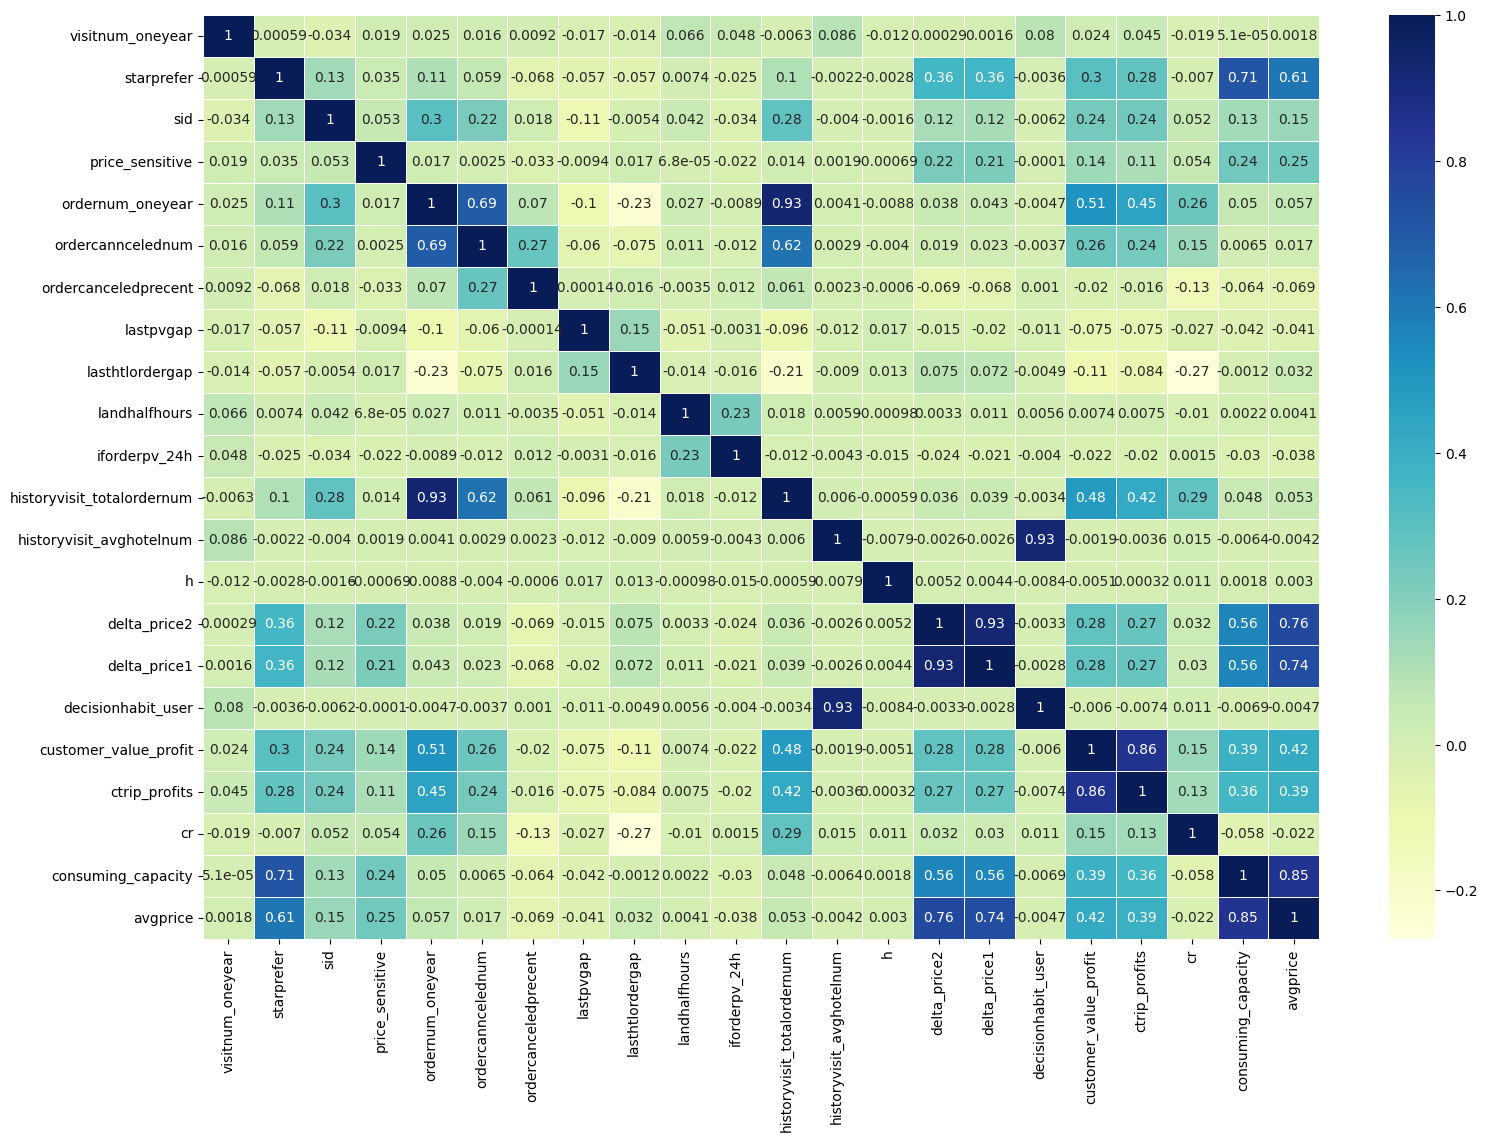

In [20]:
# User feature extraction
user_features = [
    'visitnum_oneyear', 'starprefer', 'sid', 'price_sensitive', 'ordernum_oneyear', 
    'ordercanncelednum', 'ordercanceledprecent', 'lastpvgap', 'lasthtlordergap', 
    'landhalfhours', 'iforderpv_24h', 'historyvisit_totalordernum', 
    'historyvisit_avghotelnum', 'h', 'delta_price2', 'delta_price1', 
    'decisionhabit_user', 'customer_value_profit', 'ctrip_profits', 'cr', 
    'consuming_capacity', 'avgprice'
]

# Generate the correlation matrix for user features
corr_mat = rawdf[user_features].corr()

# Plot the heatmap of the correlation matrix for user features
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_mat, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap="YlGnBu")

plt.show()


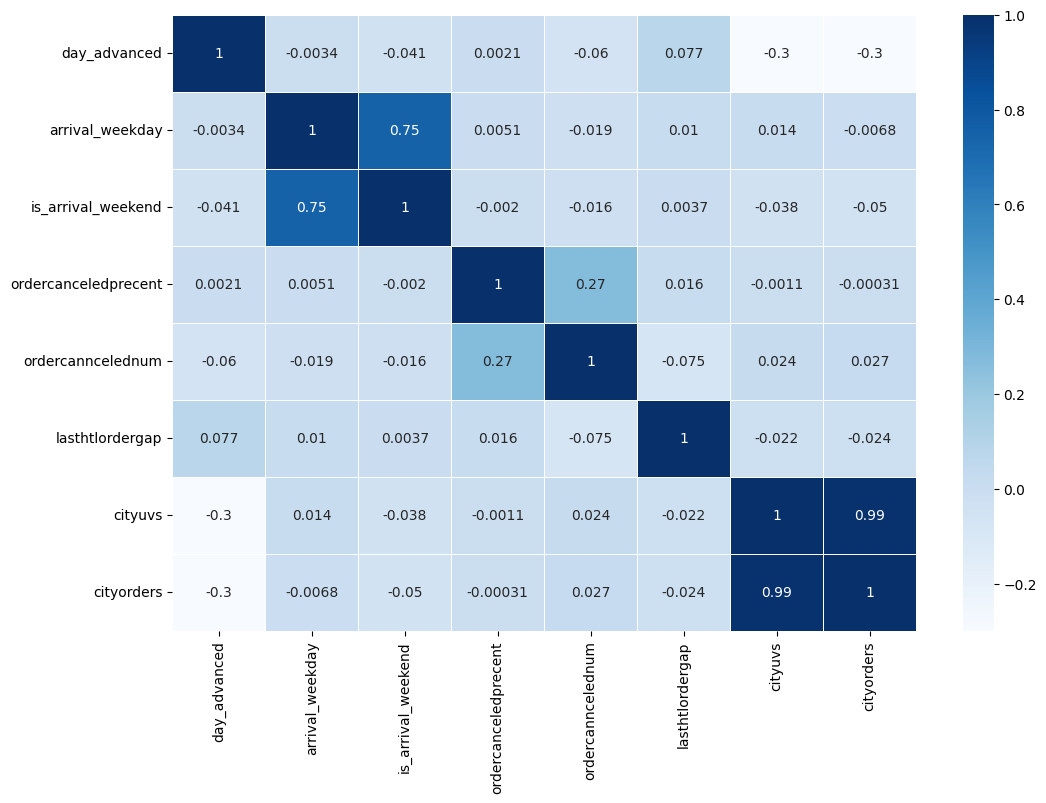

In [21]:
order_features = [
    'day_advanced', 'arrival_weekday', 'is_arrival_weekend', 'ordercanceledprecent',
    'ordercanncelednum', 'lasthtlordergap', 'cityuvs', 'cityorders'
]

# Generate the correlation matrix for order features
order_corr = rawdf[order_features].corr()

# Plot the heatmap of the correlation matrix for order features
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(order_corr, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Blues')
plt.show()


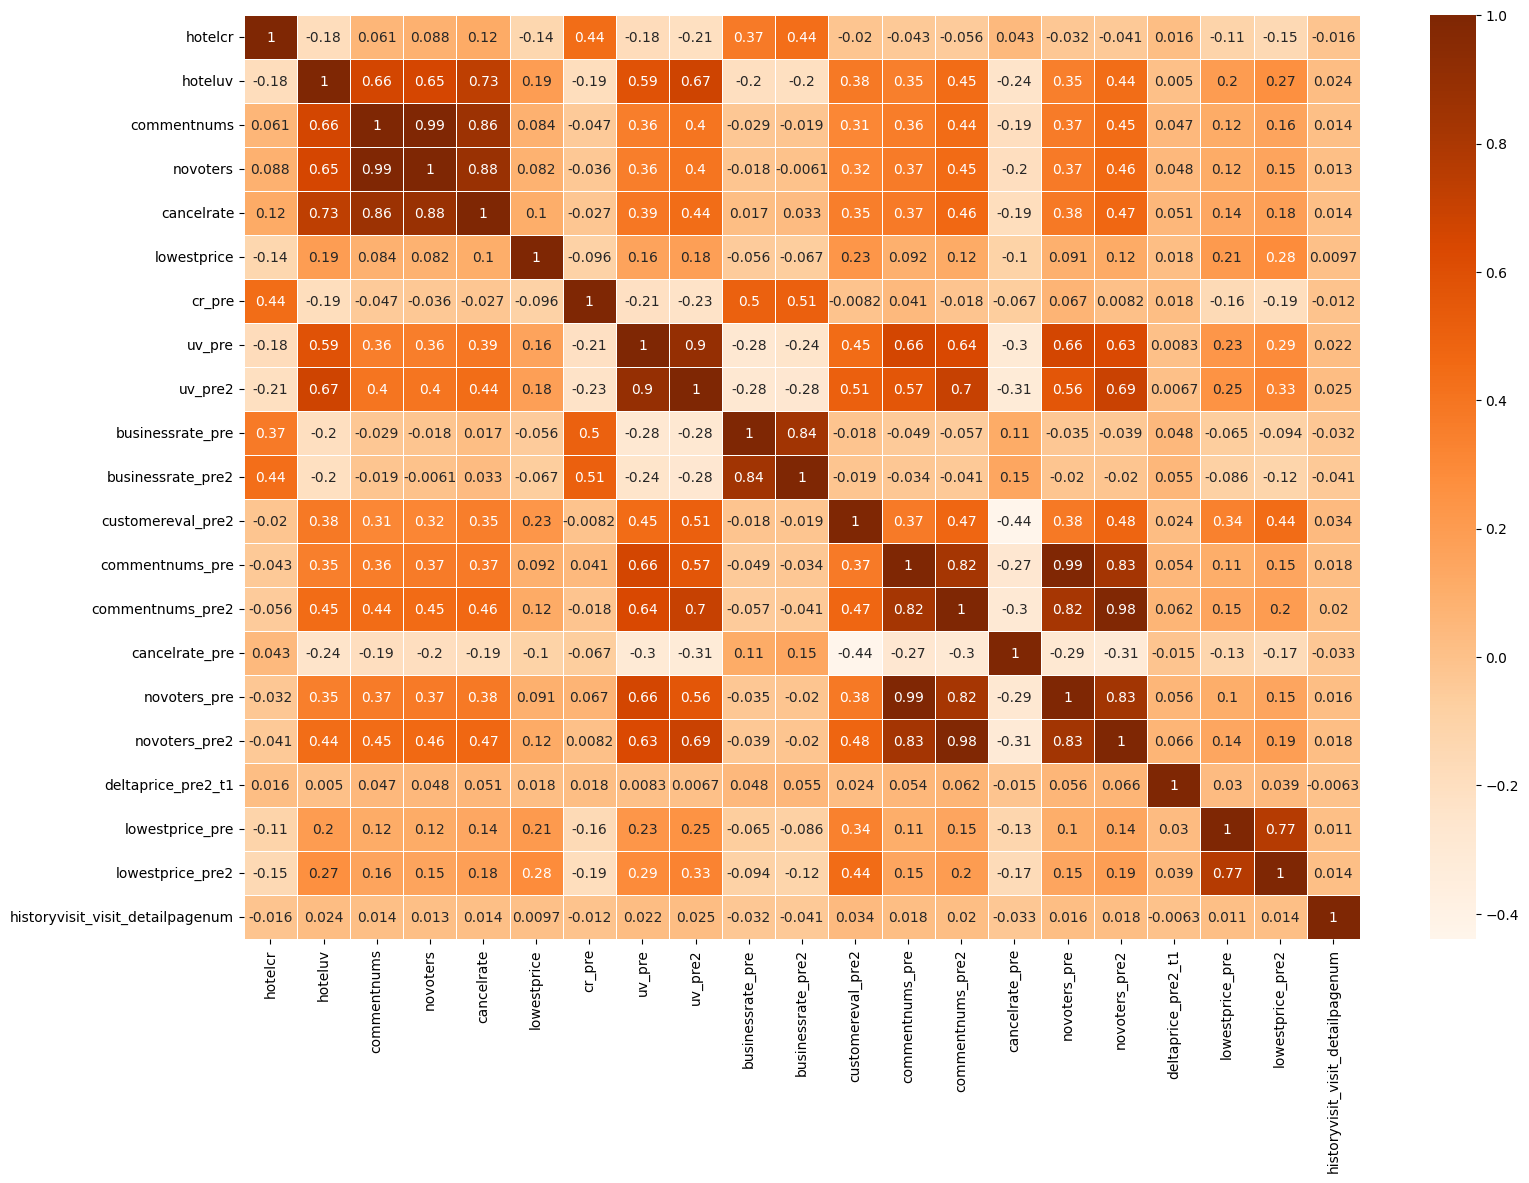

In [22]:
# Hotel information feature correlation analysis
# Hotel features
hotel_features = [
    'hotelcr', 'hoteluv', 'commentnums', 'novoters', 'cancelrate', 'lowestprice', 'cr_pre', 'uv_pre', 'uv_pre2', 
    'businessrate_pre', 'businessrate_pre2', 'customereval_pre2', 'commentnums_pre', 'commentnums_pre2', 'cancelrate_pre', 
    'novoters_pre', 'novoters_pre2', 'deltaprice_pre2_t1', 'lowestprice_pre', 'lowestprice_pre2', 'historyvisit_visit_detailpagenum'
]

# Generate the correlation matrix for hotel features
corr_mat1 = rawdf[hotel_features].corr()

# Plot the heatmap of the correlation matrix for hotel features
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr_mat1, xticklabels=True, yticklabels=True, square=False, linewidths=.5, annot=True, cmap='Oranges')
plt.show()


In [23]:
c_value = ['customer_value_profit', 'ctrip_profits']                   # User value dimension
consume_level = ['avgprice', 'consuming_capacity']                     # User consumption level
price_prefer = ['delta_price1', 'delta_price2']                        # User preferred prices
ordernum_1_year = ['ordernum_oneyear', 'historyvisit_totalordernum']   # User's historical order number in one year
hotel_hot = ['commentnums', 'novoters']                                # Hotel popularity
hotel_hot_pre = ['commentnums_pre', 'novoters_pre']                    # Hotel popularity with the most views in 24 hours
hotel_hot_pre2 = ['commentnums_pre2', 'novoters_pre2']                 # Average popularity of hotels viewed in 24 hours
hotel_uv_pre = ['uv_pre', 'uv_pre2']                                   # Number of unique visitors for the most viewed hotel in 24 hours
order_cityuvs_orders = ['cityorders', 'cityuvs']                       # Number of app UVs and orders for the current city with the same check-in date as yesterday


In [24]:
print(np.isnan(rawdf).any())

label                               False
iforderpv_24h                       False
decisionhabit_user                  False
historyvisit_totalordernum          False
hotelcr                             False
ordercanceledprecent                False
landhalfhours                       False
ordercanncelednum                   False
commentnums                         False
starprefer                          False
novoters                            False
consuming_capacity                  False
historyvisit_avghotelnum            False
cancelrate                          False
historyvisit_visit_detailpagenum    False
delta_price1                        False
price_sensitive                     False
hoteluv                             False
businessrate_pre                    False
ordernum_oneyear                    False
cr_pre                              False
avgprice                            False
lowestprice                         False
customereval_pre2                 

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)


rawdf['c_value'] = pca.fit_transform(rawdf[c_value])
rawdf['consume_level'] = pca.fit_transform(rawdf[consume_level])
rawdf['price_prefer'] = pca.fit_transform(rawdf[price_prefer])
rawdf['ordernum_1_year'] = pca.fit_transform(rawdf[ordernum_1_year])
rawdf['hotel_hot'] = pca.fit_transform(rawdf[hotel_hot])
rawdf['hotel_hot_pre'] = pca.fit_transform(rawdf[hotel_hot_pre])
rawdf['hotel_hot_pre2'] = pca.fit_transform(rawdf[hotel_hot_pre2])
rawdf['hotel_uv_pre'] = pca.fit_transform(rawdf[hotel_uv_pre])
rawdf['order_cityuvs_orders'] = pca.fit_transform(rawdf[order_cityuvs_orders])

# Drop the original columns after PCA transformation
rawdf.drop(c_value, axis=1, inplace=True)
rawdf.drop(consume_level, axis=1, inplace=True)
rawdf.drop(price_prefer, axis=1, inplace=True)
rawdf.drop(ordernum_1_year, axis=1, inplace=True)
rawdf.drop(hotel_hot, axis=1, inplace=True)
rawdf.drop(hotel_hot_pre, axis=1, inplace=True)
rawdf.drop(hotel_hot_pre2, axis=1, inplace=True)
rawdf.drop(hotel_uv_pre, axis=1, inplace=True)
rawdf.drop(order_cityuvs_orders, axis=1, inplace=True)

print('Dimensions after PCA reduction: {}'.format(rawdf.shape))  # (684128, 40)


Dimensions after PCA reduction: (684401, 40)


In [26]:
from sklearn.preprocessing import StandardScaler
y=rawdf['label']
x = rawdf.drop('label', axis=1)
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

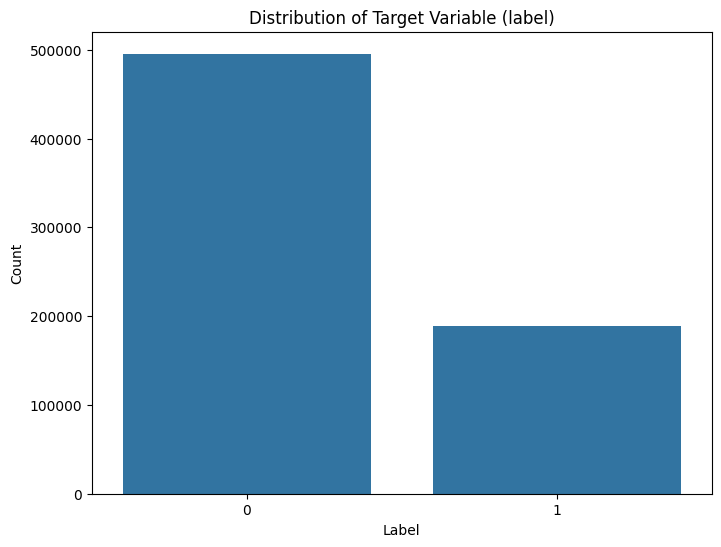

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=rawdf)
plt.title('Distribution of Target Variable (label)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23333)

In [37]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()                                                # Instantiate a GaussianNB model
gnb.fit(X_train, y_train)                                         # Train the model
y_prob = gnb.predict_proba(X_test)[:, 1]                          # Predict the probability of class 1
y_pred = gnb.predict(X_test)                                      # Model predictions on the test set
fpr_gnb, tpr_gnb, threshold_gnb = metrics.roc_curve(y_test, y_prob)  # Get true positive rate, false positive rate, and thresholds
auc_gnb = metrics.auc(fpr_gnb, tpr_gnb)                            # AUC score
score_gnb = metrics.accuracy_score(y_test, y_pred)                 # Model accuracy
print('Model accuracy: {0}, AUC score: {1}'.format(score_gnb, auc_gnb))
print('============================================================')
print(classification_report(y_test, y_pred, digits=2))

Model accuracy: 0.6061615563883958, AUC score: 0.6629492995741378
              precision    recall  f1-score   support

           0       0.81      0.59      0.68     99171
           1       0.38      0.65      0.47     37710

    accuracy                           0.61    136881
   macro avg       0.60      0.62      0.58    136881
weighted avg       0.69      0.61      0.63    136881



In [30]:
# Support Vector Classifier
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1, max_iter=100, probability=True).fit(X_train, y_train) # Radial basis function kernel, C is the penalty term, max_iter is the maximum number of iterations
y_prob = svc.decision_function(X_test)
y_pred = svc.predict(X_test)
fpr_svc, tpr_svc, threshold_svc = metrics.roc_curve(y_test, y_prob)
auc_svc = metrics.auc(fpr_svc, tpr_svc)
score_svc = metrics.accuracy_score(y_test, y_pred)
print('Model accuracy: {0}, AUC score: {1}'.format(score_svc, auc_svc))
print('============================================================')
print(classification_report(y_test, y_pred, digits=2))

Model accuracy: 0.4886434201971055, AUC score: 0.47894402485761034
              precision    recall  f1-score   support

           0       0.71      0.50      0.59     99171
           1       0.26      0.46      0.33     37710

    accuracy                           0.49    136881
   macro avg       0.48      0.48      0.46    136881
weighted avg       0.59      0.49      0.52    136881



In [31]:
# Decision Tree Classifier
from sklearn import tree
dtc = tree.DecisionTreeClassifier()                              # Instantiate a Decision Tree model
dtc.fit(X_train, y_train)                                        # Train the model
y_prob = dtc.predict_proba(X_test)[:, 1]                         # Predict the probability of class 1
y_pred = dtc.predict(X_test)                                     # Model predictions on the test set 
fpr_dtc, tpr_dtc, threshold_dtc = metrics.roc_curve(y_test, y_prob)   # Get true positive rate, false positive rate, and thresholds
score_dtc = metrics.accuracy_score(y_test, y_pred)                
auc_dtc = metrics.auc(fpr_dtc, tpr_dtc) 
print('Model accuracy: {0}, AUC score: {1}'.format(score_dtc, auc_dtc))
print('============================================================')
print(classification_report(y_test, y_pred, digits=2))

Model accuracy: 0.8760017825702617, AUC score: 0.8486872997622312
              precision    recall  f1-score   support

           0       0.92      0.91      0.91     99171
           1       0.77      0.79      0.78     37710

    accuracy                           0.88    136881
   macro avg       0.84      0.85      0.85    136881
weighted avg       0.88      0.88      0.88    136881



In [32]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()                                     # Instantiate a Random Forest Classifier
rfc.fit(X_train, y_train)                                           # Train the Random Forest model
y_prob = rfc.predict_proba(X_test)[:, 1]                            # Predict the probability of class 1
y_pred = rfc.predict(X_test)                                         # Model predictions on the test set
fpr_rfc, tpr_rfc, threshold_rfc = metrics.roc_curve(y_test, y_prob)   # Get true positive rate, false positive rate, and thresholds 
auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)                             # AUC score
score_rfc = metrics.accuracy_score(y_test, y_pred)                  # Model accuracy
print('Model accuracy: {0}, AUC score: {1}'.format(score_rfc, auc_rfc))
print('============================================================')
print(classification_report(y_test, y_pred, digits=2))

Model accuracy: 0.9226773620882373, AUC score: 0.973013310575378
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     99171
           1       0.97      0.74      0.84     37710

    accuracy                           0.92    136881
   macro avg       0.94      0.87      0.89    136881
weighted avg       0.93      0.92      0.92    136881



In [33]:
# XGBoost
import xgboost as xgb
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)
params = { 
    'booster': 'gbtree', 'objective': 'binary:logistic', 'eval_metric': 'auc',
    'max_depth': 8, 'gamma': 0, 'lambda': 2, 'subsample': 0.7, 'colsample_bytree': 0.8,
    'min_child_weight': 3, 'eta': 0.2, 'nthread': 8, 'silent': 1
}
watchlist = [(dtrain, 'train')]
bst = xgb.train(params, dtrain, num_boost_round=100, evals=watchlist)
y_prob = bst.predict(dtest)
y_pred = (y_prob >= 0.5).astype(int)
fpr_xgb, tpr_xgb, threshold_xgb = metrics.roc_curve(y_test, y_prob)   
auc_xgb = metrics.auc(fpr_xgb, tpr_xgb)    # AUC score
score_xgb = metrics.accuracy_score(y_test, y_pred)    # Model accuracy
print('Model accuracy: {0}, AUC score: {1}'.format(score_xgb, auc_xgb))
print('============================================================')
print(classification_report(y_test, y_pred, digits=2))

[0]	train-auc:0.72210
[1]	train-auc:0.73386
[2]	train-auc:0.74004
[3]	train-auc:0.74759
[4]	train-auc:0.75222
[5]	train-auc:0.75635
[6]	train-auc:0.76059
[7]	train-auc:0.76368
[8]	train-auc:0.76798
[9]	train-auc:0.77095
[10]	train-auc:0.77413
[11]	train-auc:0.77702
[12]	train-auc:0.78006
[13]	train-auc:0.78229
[14]	train-auc:0.78387
[15]	train-auc:0.78655
[16]	train-auc:0.78790
[17]	train-auc:0.78976
[18]	train-auc:0.79143
[19]	train-auc:0.79324
[20]	train-auc:0.79546
[21]	train-auc:0.79791
[22]	train-auc:0.80011
[23]	train-auc:0.80171
[24]	train-auc:0.80323
[25]	train-auc:0.80434
[26]	train-auc:0.80544
[27]	train-auc:0.80722
[28]	train-auc:0.80864
[29]	train-auc:0.80990
[30]	train-auc:0.81178
[31]	train-auc:0.81376
[32]	train-auc:0.81457
[33]	train-auc:0.81685
[34]	train-auc:0.81816
[35]	train-auc:0.81954
[36]	train-auc:0.82093
[37]	train-auc:0.82210
[38]	train-auc:0.82402
[39]	train-auc:0.82469
[40]	train-auc:0.82581
[41]	train-auc:0.82686
[42]	train-auc:0.82805
[43]	train-auc:0.8290

In [39]:
# Gaussian Naive Bayes
# Check the mean and variance of each feature for different classes
print("GaussianNB class 0 mean:", gnb.theta_[0])
print("GaussianNB class 1 mean:", gnb.theta_[1])
# print("GaussianNB class 0 var:", gnb.sigma_[0])
# print("GaussianNB class 1 var:", gnb.sigma_[1])

# Decision Tree
print("Decision Tree feature importances:", dtc.feature_importances_)

# Random Forest
print("Random Forest feature importances:", rfc.feature_importances_)

# XGBoost
feature_importance = bst.get_score(importance_type='weight')
print("XGBoost feature importances:", feature_importance)

GaussianNB class 0 mean: [-0.06993244  0.00014123 -0.07193263  0.00187932 -0.02083019 -0.05942312
  0.00454998 -0.0007277  -0.00604002 -0.00482673 -0.0111273   0.03311714
 -0.07069131 -0.07108316  0.02604158  0.0167905  -0.01055027 -0.00298666
  0.02726314  0.03617111  0.0363871  -0.08087648 -0.00595422 -0.10938807
 -0.00887203  0.01619149  0.04899327  0.09563982 -0.00095862  0.00689625
 -0.04743589  0.01033691 -0.01411159 -0.08514255 -0.00113004  0.0013872
  0.00379537  0.0380918  -0.06337665]
GaussianNB class 1 mean: [ 0.18468579  0.00063556  0.19027467 -0.00933972  0.05309901  0.15698705
 -0.01121827  0.00191367  0.01713567  0.01144154  0.02729877 -0.08435337
  0.18846379  0.18823903 -0.06726887 -0.04263933  0.03020629  0.0079763
 -0.07144993 -0.09360623 -0.09541123  0.215892    0.01799176  0.28897053
  0.02524689 -0.04262344 -0.12455186 -0.25136377  0.00600253 -0.01417587
  0.12662602 -0.02614341  0.03676492  0.22628816  0.00292253 -0.00224674
 -0.00881468 -0.0984163   0.16477562]


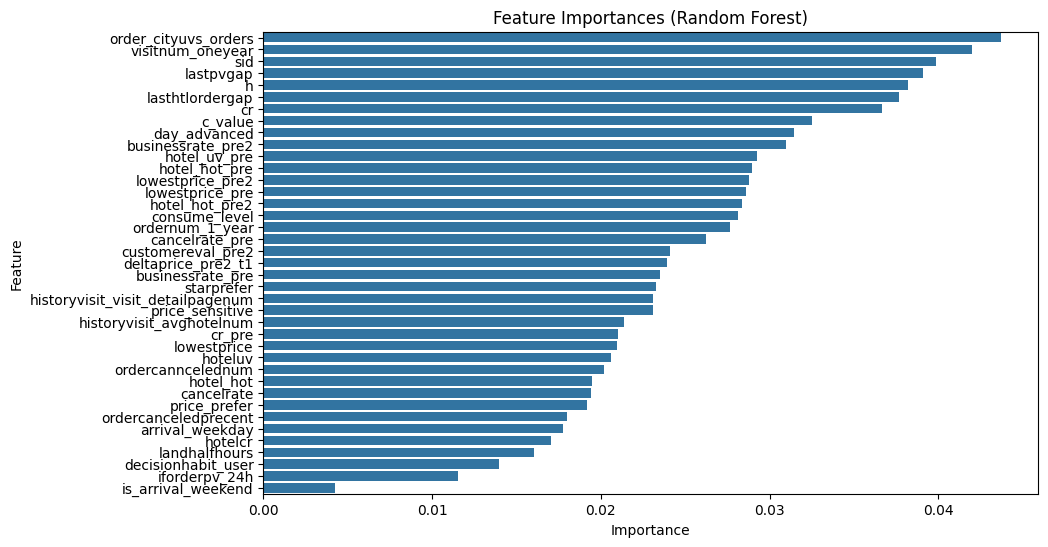

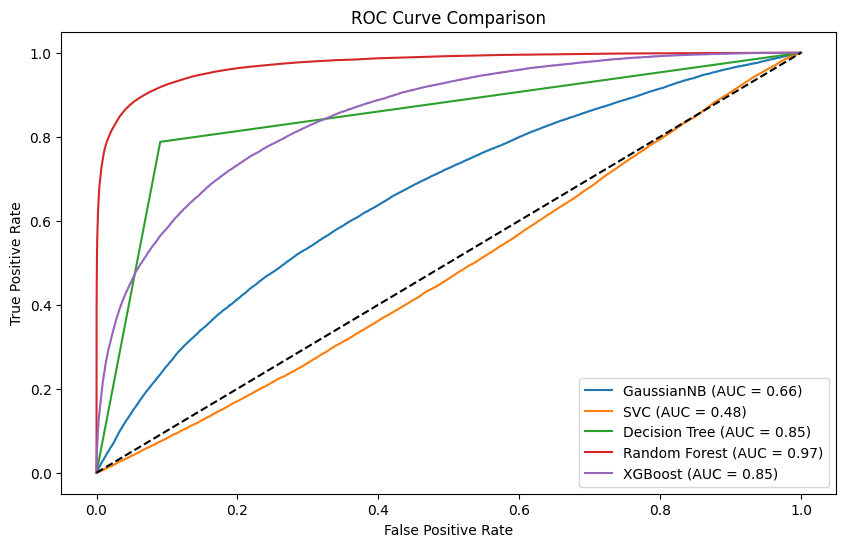

In [40]:
# Visualize feature importance
features = rawdf.columns[1:]
importances = rfc.feature_importances_

# Combine features and importance into a DataFrame
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Draw a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances (Random Forest)')
plt.show()

# Visualize ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_gnb, tpr_gnb, label='GaussianNB (AUC = {:.2f})'.format(auc_gnb))
plt.plot(fpr_svc, tpr_svc, label='SVC (AUC = {:.2f})'.format(auc_svc))
plt.plot(fpr_dtc, tpr_dtc, label='Decision Tree (AUC = {:.2f})'.format(auc_dtc))
plt.plot(fpr_rfc, tpr_rfc, label='Random Forest (AUC = {:.2f})'.format(auc_rfc))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='best')
plt.show()

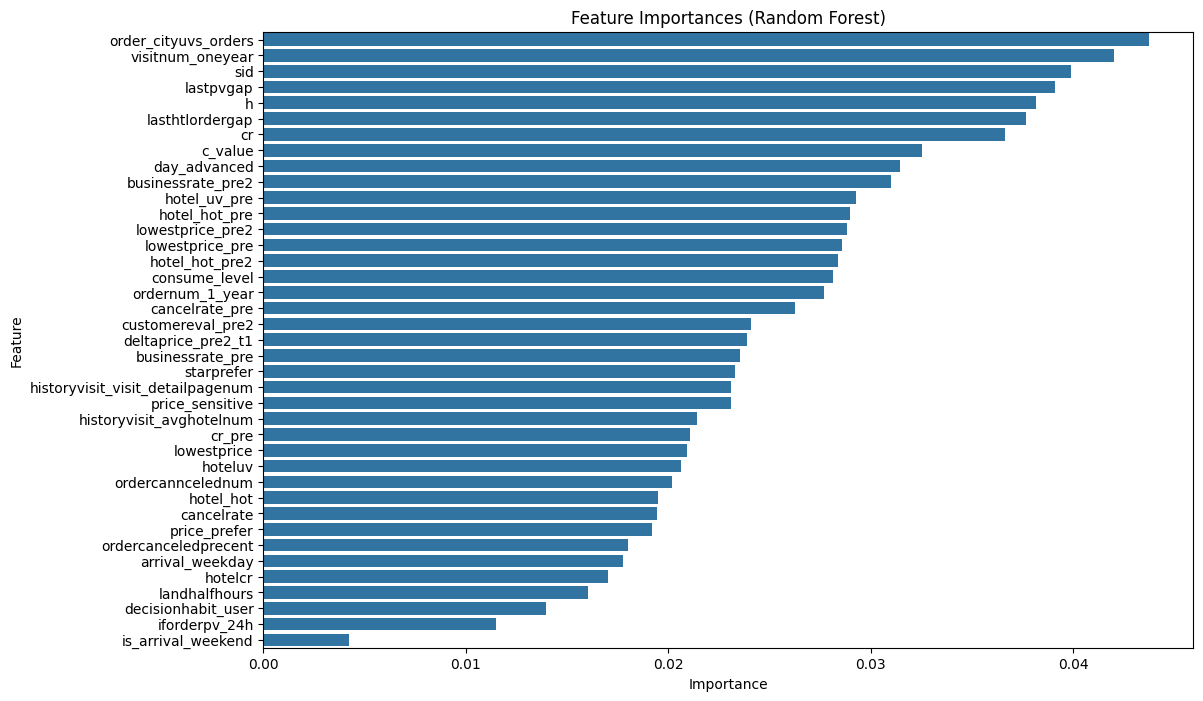

In [35]:
# Get feature names
features = rawdf.columns[1:]

# Get feature importance
importances = rfc.feature_importances_

# Create DataFrame
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Draw a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances (Random Forest)')
plt.show()